In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


np.random.seed(17) #set seed for reproducibility purposes

x = np.arange(1000) 

# yp = 3*x + 3 + 2*(np.random.poisson(3*x+3,100)-(3*x+3)) 
#generate some data with scatter following Poisson distribution
#with exp value = y from linear model, centered around 0
yp = 3*x + 3 + 30*(1-2*np.random.rand(1000))

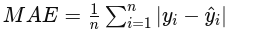
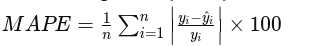
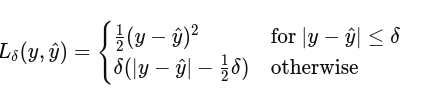

In [10]:
theta0 = np.linspace(-5, 5, 200)
theta1 = np.linspace(-5, 5, 200)

mse =np.empty((200,200))
mae = np.empty((200,200))
mape = np.empty((200,200))
hbloss = np.empty((200, 200))

delta = np.std(yp)
# delta=0.5

for i,t0 in enumerate(theta0):
    for j,t1 in enumerate(theta1):
        yactual=t0 + t1*x
        mse[i,j] = np.sum((yactual - yp)**2)/len(yp) #MSE formula
        mae[i,j] = np.sum(np.abs((yactual - yp)))/len(yp) #MAE formula
        mape[i,j] = 100/len(yp)*np.sum((yactual- yp)/yactual) #MAPE formula
        condition = delta > np.abs(yactual - yp)
        hbloss[i, j] = np.where(condition, ((yactual - yp) ** 2) / 2, delta * np.abs(yactual - yp) - delta * (1 / 2) * delta).mean() #huberloss formula

mse_ind= np.unravel_index(mse.argmin(),mse.shape)
intercept1=theta0[mse_ind[0]]
slope1 = np.abs(theta1[mse_ind[1]])
print('MSE',"intercept : ",intercept1,"slope : ",slope1)

mae_ind= np.unravel_index(mae.argmin(),mae.shape)
intercept2=theta0[mae_ind[0]]
slope2= np.abs(theta1[mae_ind[1]])
print('MAE',"intercept : ",intercept2,"slope : ",slope2)

mape_ind= np.unravel_index(mae.argmin(),mape.shape)
intercept3=theta0[mape_ind[0]]
slope3 = np.abs(theta1[mape_ind[1]])
print('MAPE' ,"intercept : ", intercept3,  "slope : ", slope3)

hub_ind= np.unravel_index(hbloss.argmin(), hbloss.shape)
intercept4= theta0[hub_ind[0]]
slope4 = np.abs(theta1[hub_ind[1]])
print('Huberloss',"intercept : ", intercept4, "slope : ", slope4)

/tmp/ipykernel_52988/1910779145.py:17: RuntimeWarning: divide by zero encountered in divide
  mape[i,j] = 100/len(yp)*np.sum((yactual- yp)/yactual) #MAPE formula


MSE intercept :  5.0 slope :  2.9899497487437188
MAE intercept :  5.0 slope :  2.9899497487437188
MAPE intercept :  5.0 slope :  2.9899497487437188
Huberloss intercept :  5.0 slope :  2.9899497487437188


(-10.0, 1000.0)

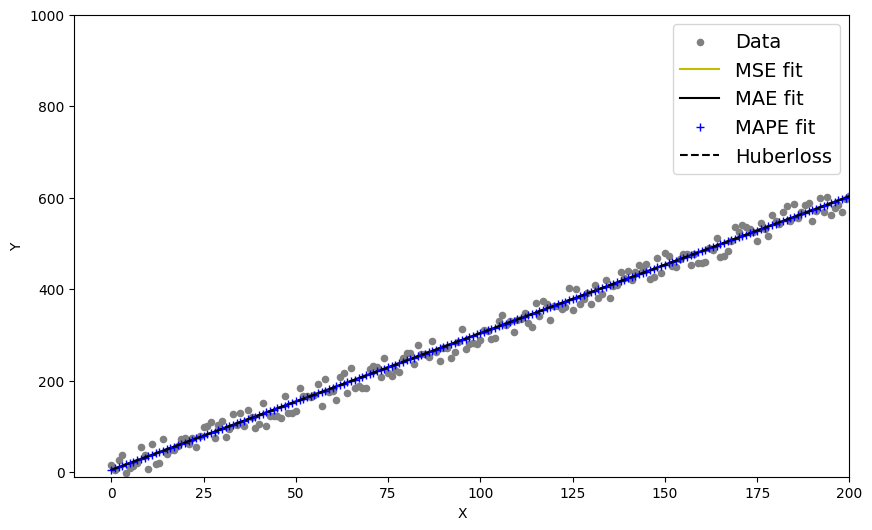

In [12]:

plt.figure(figsize = (10,6))
plt.scatter(x,yp, s =20, c = 'gray', label = 'Data')

plt.plot(x, slope1*x + intercept1, c ='y', label = 'MSE fit')

plt.plot(x, slope2*x + intercept2, c ='k', label = 'MAE fit')

plt.plot(x, slope3*x + intercept3,'+' ,c ='b', label = 'MAPE fit')

plt.plot(x, slope4*x + intercept4, '--',c ='k', label = 'Huberloss')

# plt.plot(x, 3*x + 3, c = 'r', label = 'True regression line') 

plt.legend(fontsize = 14)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-10,200)
plt.ylim(-10,1000)
